# Baseball Case Study

Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output

will be a value that represents the number of wins.

#### features:

R – Runs scored: number of times a player crosses home plate

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

Hit: reaching base because of a batted, fair ball without error by the defense

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

SO – Strikeout: number of batters who received strike three

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

#### Output: Number of predicted wins (W)

W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#reading csv file and storing in df  
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### check for duplicates

In [3]:

df.duplicated().sum()

0

 no duplicates present 

#### checking nulls

In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

no nulls present

#### checking datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- data has 30 rows and 17 columns 
- all are integer data types

#### checking how the data is defined statistically

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


#### Univariate analysis

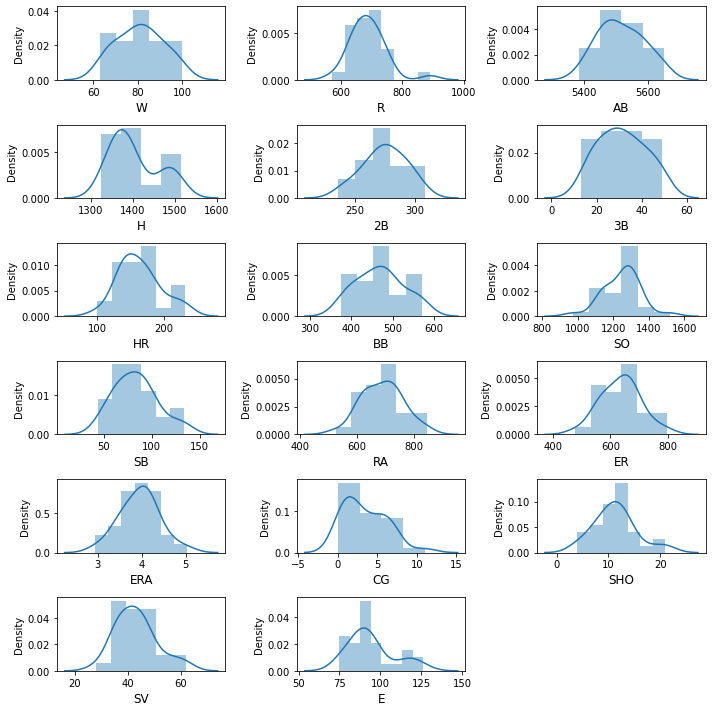

In [7]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,10))
for column in df:
    plt.subplot(6,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

#### inference

- W(Wins)
    - appears to be normally distributed 
    - ranges from 65-100, with peak at 80
    - from 70-80 and from 90-100 the density of the data appears to be the same
    - most of the wins are around 80 for teams, and few teams have managed to get 100 wins in the season


- R (Runs scored)
    - appears to be normally distributed 
    - value ranges from 600-800, peak at 680
    - outliers are present, has data points around 900
    - very few teams have managed to score 900 runs, most of the team score around 650 in the season
    
    
- AB (At bat)
    - appears to be normally distributed
    - ranges from 5400-5650, peak at 5550
    - positively skewed, skewness is very little
    - as AB increase, would imply decreasing the chance for foul, increasing pressure the batter
    - also infer that the pitchers in the team are in high form and top tier
    
    
- H (Hit)
    - not uniformly distributed 
    - presence of two modes 1380 and 1480
    - range is from 1320 to 1475 
    
    
- 2B (second base)
    - appears to be normally distributed
    - ranges from 240-300, peak  270
    - negatively skewed, skewness is very little
  
  
- 3B (third base)
     - appears to be normally distributed
     - ranges from 15-50, peak 35
     - the no. of times batter reaches the 3rd base is very low, compared to 2nd base
    
  
- HR (Home runs)
    - appears to be normally distributed
    - ranges from 100-200, peak 170
    - positively skewed
    
    
- BB (Base on balls)
    - appears to be normally distributed
    - ranges from 375-550, peak 475
    - pitchers must be trained to avoid this as the batter is awarded 1st base and helps the batting teams to score runs
    
    
- SO (Strikeout)
    - appears to be normally distributed
    - ranges from 1100-1400, peak 1250
    - negatively skewed
    - teams which have least SO has high chance to win the game, as this can increase the no. of batters in the bases and also to hit home run
    
    
- SB (Stolen base)
    - appears to be normally distributed
    - ranges from 40-140, peak 80
    - as the no. of SB increases the chance to score runs also increases especially at 3rd base


- RA (Run average)
  - appears to be normally distributed
  - ranges from 550-850, peak 750
  - RA increases implies that strikers are able to score home runs or make the batters present in other bases to score runs, this can be due to many reasons fouls, misplay, BB, pitchers poor performance etc
  
  
- ER (Earned run)
  - appears to be normally distributed
  - ranges from 500-800, peak 650
  - slightly skewed
  - higher the ER, higher the chance to win 


- ERA (Earned run average)
  - appears to be normally distributed
  - ranges from 3-5, peak 4
  - slightly skewed
  
  
- CG (Complete game)
    - not uniformly distributed
    - value is from 0-7.5
    - highly positively skewed
    - most of the team prefer to have zero complete game, but there are instances where teams have used completed game upto 10
    
    

- SHO (Shutout)
  - appears to be normally distributed
  - ranges from 5-20, peak 12
  - pitcher who perform SHO are in good form and make it difficult for the batters and add more pressure   
  
  
- SV (Save)
    - accumulation of data in the range 40-50
    - uniformly distributed


- E (Errors)
    - not uniformly distributed
    - presence of outliers
    - large accumulation of data at 90
    

#### Bivariate analysis

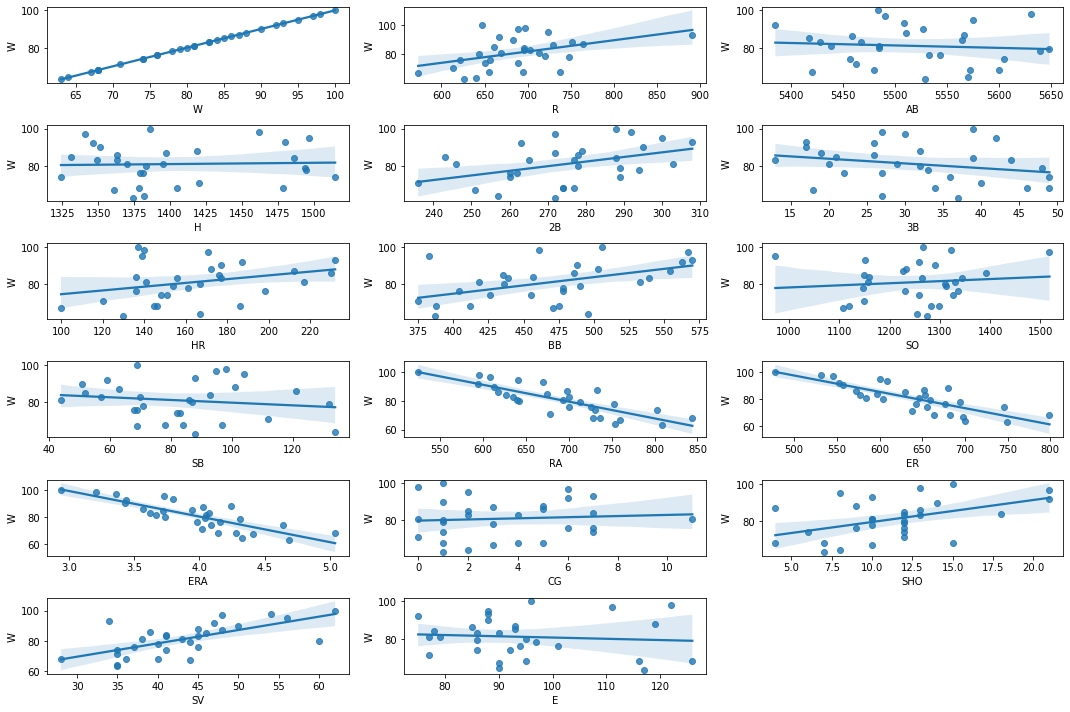

In [8]:
#plotting regplot between W and other features and seeing their relationship 
j=0
plt.figure(figsize=(15,10))
for column in df:
    plt.subplot(6,3,j+1)
    sns.regplot(x=df[column],y=df['W'],data=df)
    j+=1
plt.tight_layout() 

- the graphs gives an idea of how W is correlated with features 


#### checking correlation

In [9]:
df.corr()["W"].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

- ERA has the highest correlation value 0.81 negatively correlated
- H has the least correlation 0.03 

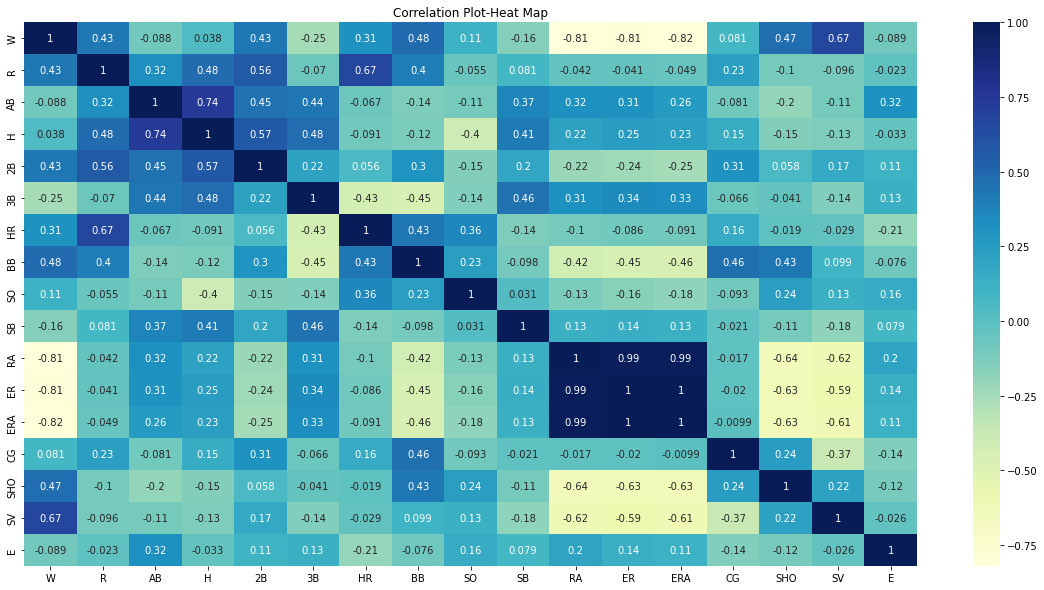

In [10]:
#plotting heatmap to see the correlation 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

- R and HR has correlation of 0.67
- R and 2B has correlation of 0.56
- AB and H has correlation of 0.74
- H and 2B has correlation of 0.57
- R and ER has correlation of 0.99
- R and SHO has correlation of -0.64
- R and SV has correlation of -0.62
- R and ERA has correlation of 0.99
- ER and ERA has correlation 1
- SHO and RA has correlation -0.64
- SHO and ER has correlation -0.63
- SHO and ERA has correlation -0.61
- SV and RA has correlation -0.62
- SV and ER has correlation -0.59
- SV and ERA has correlation -0.61

#### inference
- multicollinearity probelm
- R and HR are correlated because R also takes into account HR
- R and 2B, R and 3B are correlated because inorder to score runs the player need to go through these bases
- AB and H are correlated because both take account of hits where AB implies after hit player reaches base safely
- R and ER, R takes account of ER
- ER and ERA, ERA is the avg of ER hence related to ER and R
- SHO, SV have influnce on RA,ER because these decreases the run scored hence decreasing the RA

#### Checking for multicollinearity by using vif

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop('W',axis=1)
d=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
11,1706.597165,ERA
12,1317.056521,CG
10,197.480090,ER
1,23.249385,AB
0,19.891017,R
2,13.665681,H
6,10.967594,BB
15,10.957250,E
3,10.070734,2B
4,4.883096,3B


#### dropping ERA

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop(['W','ERA'],axis=1)
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
9,171.126556,RA
10,163.993427,ER
0,11.375311,R
5,9.741435,HR
2,9.162137,H
1,4.464580,AB
3,3.896371,2B
6,3.804402,BB
13,3.740063,SV
12,3.480272,SHO


#### dropping ERA and RA

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop(['W','ERA','RA'],axis=1)
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
0,11.014555,R
2,8.793087,H
5,7.895810,HR
9,4.857100,ER
1,4.365260,AB
3,3.746020,2B
6,3.477383,BB
11,3.198133,SHO
4,3.112275,3B
12,2.825900,SV


#### Making necessary changes to dataset by dropping columns

In [14]:
df.drop(['ERA','RA'],axis=1,inplace=True)


#### checking correlation with target 

In [15]:
df.corr()["W"].sort_values()

ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

there is a good correlation with the target the least being with H

#### plotting heatmap to see the correlation with other features


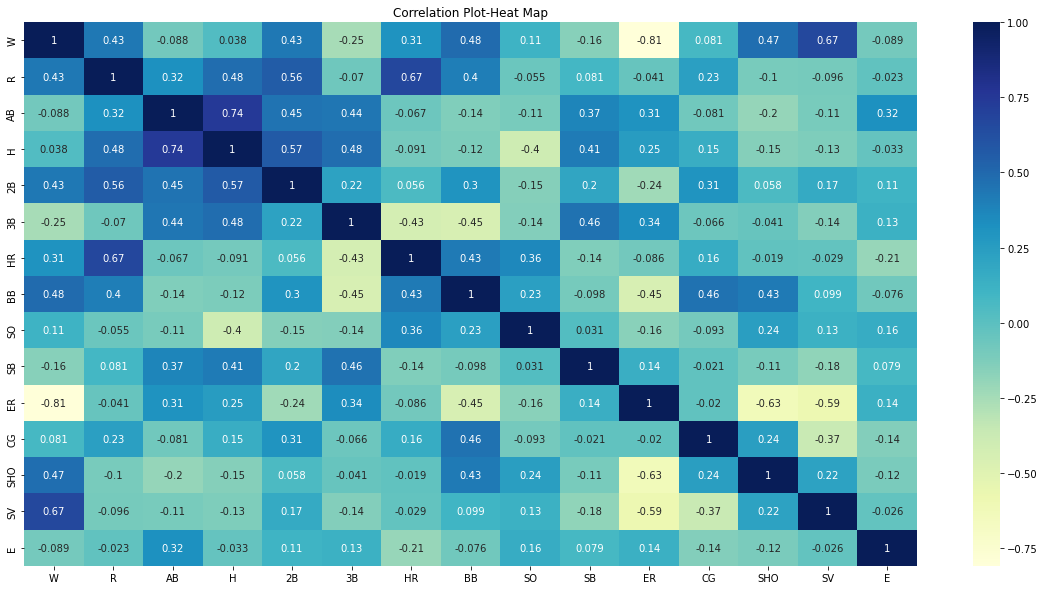

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

- correlation between features have been reduced to a large extend 
- multicollinearity problem has also been checked and removed

#### check skewness

In [17]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
W      0.047089
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

 R and HR is not within the limits need to treat it 

#### using power transform to transform

In [18]:
#using power transform to transform and normalize the dataset and storing it in A and copying it to df
from sklearn.preprocessing import power_transform
B=df.drop('W',axis=1).copy()
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
df[B.columns]=A.copy()
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,95,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.497425,-0.359844,-0.789579,1.546378,-0.334953
1,83,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.257974,-0.359844,0.251775,0.360444,-0.532211
2,81,-0.244821,-1.126097,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.746906,1.993513,-0.245393,-0.607594,-1.342331
3,76,-1.285129,0.267369,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.113575,1.220103,-0.510759,-0.764453,0.678524
4,74,0.135622,1.267645,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.582654,1.220103,0.251775,-1.095010,-0.532211
5,93,2.671903,-0.081784,4.440892e-16,1.998506,-1.461062,1.937860,1.708067,-0.957960,0.298238,-0.380464,1.220103,-0.245393,-1.269438,-0.334953
6,87,1.309688,0.745489,0.000000e+00,-0.198558,-1.224911,1.460099,1.461121,-0.228668,-0.910154,0.243552,0.064630,-2.099326,0.718082,0.104539
7,81,0.551199,-0.430937,-1.665335e-16,-1.556454,-1.110302,1.583551,-0.904450,0.807174,-2.102897,0.156937,-1.729889,-0.245393,0.104606,-1.614550
8,80,-0.770266,-0.430937,-8.326673e-17,0.141687,0.130611,0.200058,-0.559191,0.594561,0.255285,-0.453532,-0.909181,0.251775,1.905480,0.261504
9,78,1.088096,1.736328,4.996004e-16,1.099405,0.225256,0.007404,0.204599,-0.986257,-0.489090,0.845910,0.064630,-0.245393,-0.309109,0.409004


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,8.096667e+01,1.045345e+01,6.300000e+01,7.400000e+01,8.100000e+01,8.775000e+01,1.000000e+02
R,30.0,6.666250e-11,1.017095e+00,-2.648512e+00,-6.119693e-01,1.356222e-01,6.363778e-01,2.671903e+00
AB,30.0,-5.242537e-04,1.017095e+00,-1.972242e+00,-7.462751e-01,-6.605596e-02,7.879533e-01,1.855858e+00
H,30.0,1.202742e-17,3.222585e-16,-4.996004e-16,-2.220446e-16,-8.326673e-17,3.053113e-16,5.828671e-16
2B,30.0,-5.074644e-16,1.017095e+00,-2.029345e+00,-7.297600e-01,-1.004692e-03,7.770392e-01,1.998506e+00
3B,30.0,-1.628327e-16,1.017095e+00,-1.966661e+00,-7.811404e-01,3.425508e-02,7.718724e-01,1.616444e+00
HR,30.0,7.179442e-16,1.017095e+00,-2.485131e+00,-7.176843e-01,-7.558883e-02,5.065887e-01,1.937860e+00
BB,30.0,-2.479498e-15,1.017095e+00,-1.779520e+00,-7.067027e-01,1.164648e-01,6.047005e-01,1.708067e+00
SO,30.0,-1.063964e-15,1.017095e+00,-2.569896e+00,-8.965199e-01,1.101858e-01,6.096915e-01,2.774844e+00
SB,30.0,6.920390e-16,1.017095e+00,-2.102897e+00,-5.908464e-01,1.018819e-01,6.490052e-01,1.963116e+00


- after transformation almost all features have mean at 0 and standard deviation at 1

In [19]:
#check
df.skew().sort_values()

3B    -0.072933
CG    -0.059785
R     -0.055006
2B    -0.035315
SB    -0.010455
BB    -0.007760
ER    -0.001940
HR    -0.000065
H      0.000000
SV     0.000836
SHO    0.006560
SO     0.041170
W      0.047089
E      0.063909
AB     0.090410
dtype: float64

all features are within the acceptable limits of 0.65 to -0.65 

#### visualizing

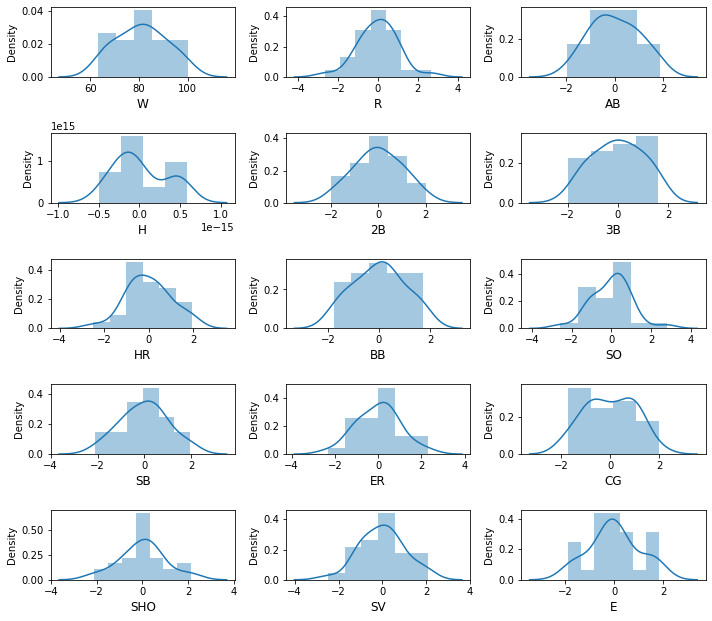

In [20]:
# plotting distribution graph  
j=0
plt.figure(figsize=(10,10))
for column in df:
    plt.subplot(6,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- features appears to be normaly distributed 

#### Outliers check  

W         AxesSubplot(0.125,0.772143;0.133621x0.107857)
R      AxesSubplot(0.285345,0.772143;0.133621x0.107857)
AB      AxesSubplot(0.44569,0.772143;0.133621x0.107857)
H      AxesSubplot(0.606034,0.772143;0.133621x0.107857)
2B     AxesSubplot(0.766379,0.772143;0.133621x0.107857)
3B        AxesSubplot(0.125,0.642714;0.133621x0.107857)
HR     AxesSubplot(0.285345,0.642714;0.133621x0.107857)
BB      AxesSubplot(0.44569,0.642714;0.133621x0.107857)
SO     AxesSubplot(0.606034,0.642714;0.133621x0.107857)
SB     AxesSubplot(0.766379,0.642714;0.133621x0.107857)
ER        AxesSubplot(0.125,0.513286;0.133621x0.107857)
CG     AxesSubplot(0.285345,0.513286;0.133621x0.107857)
SHO     AxesSubplot(0.44569,0.513286;0.133621x0.107857)
SV     AxesSubplot(0.606034,0.513286;0.133621x0.107857)
E      AxesSubplot(0.766379,0.513286;0.133621x0.107857)
dtype: object

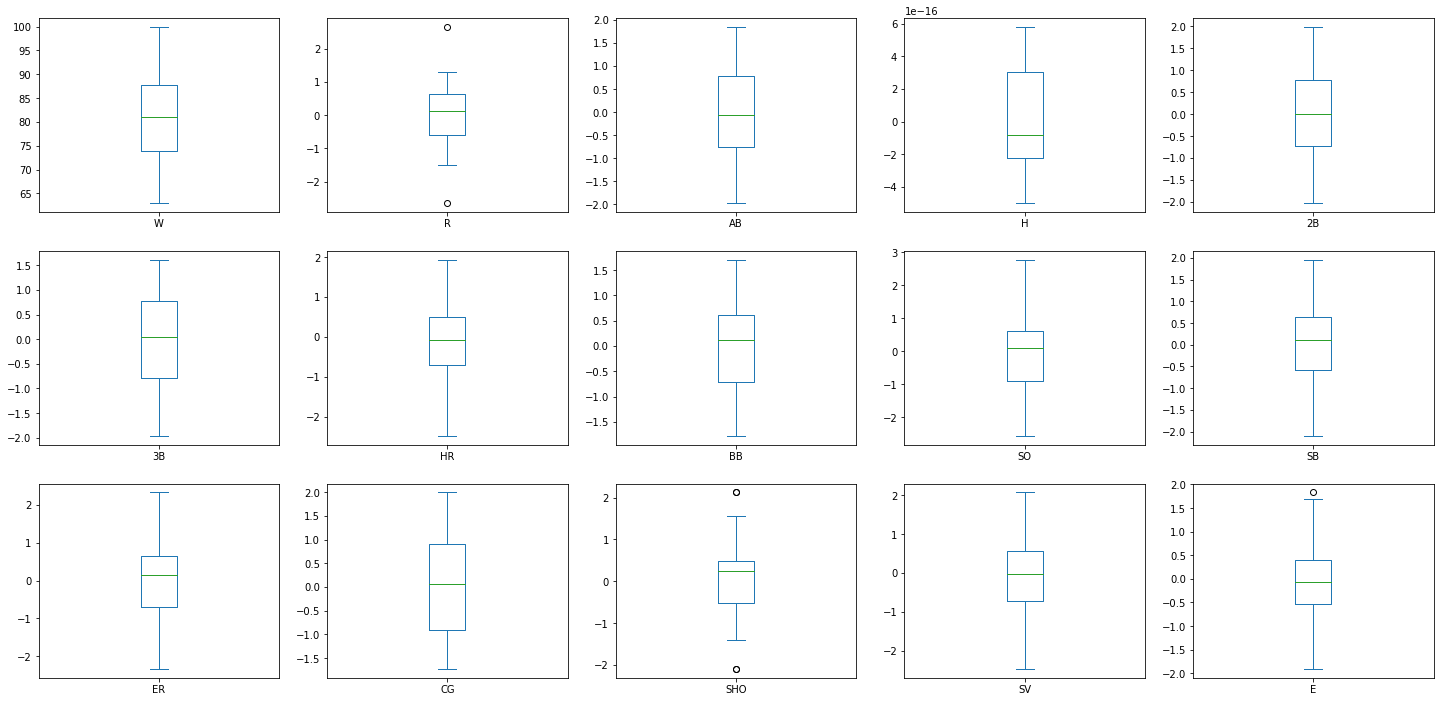

In [21]:
# visualizing
df.plot(kind='box',subplots=True, layout=(6,5),figsize=(25,25))

- outliers presence is absent in many features 
- E, SHO,R have outliers 
- using z score for confirmation and remove if any exists 

#### Zscore

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  0.0  %


#### spliting data

In [23]:
X=df_x.drop(['W'],axis=1)
Y=df_x['W']

#### Trying differnent algorithm

In [24]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 

In [25]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 
#loop used to find the best random state
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=(r2_score(y_test,y_pred))*100
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [26]:
# used to get test accuracy, train accuracy, mse, mae
def te_t(regr,x_train,x_test,y_train,y_test,R):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
    A.append(round(r2_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))

In [27]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test,R):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(r2_score(y_train,y_tr)*100,1)
    te_ac=round(r2_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [28]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
R=maxr2_score(reg,X,Y)

r2 score corresponding to  0  is  -172.0034246575342
r2 score corresponding to  1  is  19.558359621451103
r2 score corresponding to  2  is  49.4869771112865
r2 score corresponding to  3  is  36.61527680448493
r2 score corresponding to  4  is  -70.06451612903226
r2 score corresponding to  5  is  48.88616891064872
r2 score corresponding to  6  is  28.319672131147534
r2 score corresponding to  7  is  -46.633416458852835
r2 score corresponding to  8  is  51.37499999999999
r2 score corresponding to  9  is  -183.32592263228102
r2 score corresponding to  10  is  -173.5
r2 score corresponding to  11  is  -216.84053651266768
r2 score corresponding to  12  is  31.719128329297817
r2 score corresponding to  13  is  -34.60000000000001
r2 score corresponding to  14  is  -6.745623069001017
r2 score corresponding to  15  is  29.170230966638133
r2 score corresponding to  16  is  -75.71935356720533
r2 score corresponding to  17  is  -50.54945054945055
r2 score corresponding to  18  is  -79.2659368963296

In [29]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test,R)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test,R)

test accuracy is 45.1
train accuracy is 100.0


At cv is 2 cv score is -53.38  
 test accuracy is 45.1 

At cv is 3 cv score is -22.39  
 test accuracy is 45.1 

At cv is 4 cv score is -55.38  
 test accuracy is 45.1 

At cv is 5 cv score is -194.73  
 test accuracy is 45.1 

At cv is 6 cv score is -110.75  
 test accuracy is 45.1 

At cv is 7 cv score is -139.47  
 test accuracy is 45.1 

At cv is 8 cv score is -236.09  
 test accuracy is 45.1 

At cv is 9 cv score is -1185.76  
 test accuracy is 45.1 

At cv is 10 cv score is -1204.57  
 test accuracy is 45.1 

At cv is 11 cv score is -2202.97  
 test accuracy is 45.1 

At cv is 12 cv score is -1683.52  
 test accuracy is 45.1 

At cv is 13 cv score is -5362.13  
 test accuracy is 45.1 

At cv is 14 cv score is -2544.4  
 test accuracy is 45.1 

At cv is 15 cv score is -2605.73  
 test accuracy is 45.1 

At cv is 16 cv score is nan  
 test accuracy is 45.1 

At cv is 17 cv score is nan  
 test accuracy is 45.1 

At cv is 18 cv score 

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
R=maxr2_score(rf_reg,X,Y)

r2 score corresponding to  0  is  48.836053082191775
r2 score corresponding to  1  is  58.72217665615141
r2 score corresponding to  2  is  39.09712707182319
r2 score corresponding to  3  is  51.25199719691661
r2 score corresponding to  4  is  29.166167741935467
r2 score corresponding to  5  is  60.71120685434518
r2 score corresponding to  6  is  65.34805737704919
r2 score corresponding to  7  is  -0.0846758104737999
r2 score corresponding to  8  is  50.732862499999996
r2 score corresponding to  9  is  6.146607381058322
r2 score corresponding to  10  is  5.45734999999995
r2 score corresponding to  11  is  34.14321907600591
r2 score corresponding to  12  is  16.323026634382476
r2 score corresponding to  13  is  36.69795999999997
r2 score corresponding to  14  is  52.345695159629244
r2 score corresponding to  15  is  49.794550898203596
r2 score corresponding to  16  is  41.31638155301538
r2 score corresponding to  17  is  -0.5924038461538661
r2 score corresponding to  18  is  34.463966516

In [31]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_reg,x2_train,x2_test,y2_train,y2_test,R)
print('\n')
score(rf_reg,x2_train,x2_test,y2_train,y2_test,R)

test accuracy is 82.0
train accuracy is 92.6


At cv is 2 cv score is -48.46  
 test accuracy is 82.0 

At cv is 3 cv score is 37.48  
 test accuracy is 82.0 

At cv is 4 cv score is 40.15  
 test accuracy is 82.0 

At cv is 5 cv score is -94.15  
 test accuracy is 82.0 

At cv is 6 cv score is 22.59  
 test accuracy is 82.0 

At cv is 7 cv score is 5.77  
 test accuracy is 82.0 

At cv is 8 cv score is -31.22  
 test accuracy is 82.0 

At cv is 9 cv score is -1300.71  
 test accuracy is 82.0 

At cv is 10 cv score is -1259.47  
 test accuracy is 82.0 

At cv is 11 cv score is -1264.13  
 test accuracy is 82.0 

At cv is 12 cv score is -1279.53  
 test accuracy is 82.0 

At cv is 13 cv score is -2465.53  
 test accuracy is 82.0 

At cv is 14 cv score is -3789.44  
 test accuracy is 82.0 

At cv is 15 cv score is -3174.42  
 test accuracy is 82.0 

At cv is 16 cv score is nan  
 test accuracy is 82.0 

At cv is 17 cv score is nan  
 test accuracy is 82.0 

At cv is 18 cv score is nan  


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()
R=maxr2_score(knr,X,Y)

r2 score corresponding to  0  is  30.270547945205482
r2 score corresponding to  1  is  62.05047318611988
r2 score corresponding to  2  is  46.66456195737963
r2 score corresponding to  3  is  65.57673440784862
r2 score corresponding to  4  is  28.71225806451616
r2 score corresponding to  5  is  56.106731946144414
r2 score corresponding to  6  is  47.922950819672096
r2 score corresponding to  7  is  -20.53865336658347
r2 score corresponding to  8  is  43.344999999999956
r2 score corresponding to  9  is  69.01022676745218
r2 score corresponding to  10  is  34.179999999999986
r2 score corresponding to  11  is  43.21311475409843
r2 score corresponding to  12  is  38.28571428571427
r2 score corresponding to  13  is  42.560000000000045
r2 score corresponding to  14  is  61.16374871266734
r2 score corresponding to  15  is  52.83147989734815
r2 score corresponding to  16  is  54.12849822625151
r2 score corresponding to  17  is  48.15934065934064
r2 score corresponding to  18  is  15.09594333547

In [33]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(knr,x3_train,x3_test,y3_train,y3_test,R)
print('\n')
score(knr,x3_train,x3_test,y3_train,y3_test,R)

test accuracy is 71.7
train accuracy is 59.0


At cv is 2 cv score is -1.01  
 test accuracy is 71.7 

At cv is 3 cv score is 39.16  
 test accuracy is 71.7 

At cv is 4 cv score is 39.44  
 test accuracy is 71.7 

At cv is 5 cv score is -19.7  
 test accuracy is 71.7 

At cv is 6 cv score is 33.6  
 test accuracy is 71.7 

At cv is 7 cv score is 2.34  
 test accuracy is 71.7 

At cv is 8 cv score is 15.32  
 test accuracy is 71.7 

At cv is 9 cv score is -1920.16  
 test accuracy is 71.7 

At cv is 10 cv score is -1735.07  
 test accuracy is 71.7 

At cv is 11 cv score is -1584.93  
 test accuracy is 71.7 

At cv is 12 cv score is -1685.25  
 test accuracy is 71.7 

At cv is 13 cv score is -5710.76  
 test accuracy is 71.7 

At cv is 14 cv score is -5655.57  
 test accuracy is 71.7 

At cv is 15 cv score is -5286.03  
 test accuracy is 71.7 

At cv is 16 cv score is nan  
 test accuracy is 71.7 

At cv is 17 cv score is nan  
 test accuracy is 71.7 

At cv is 18 cv score is nan  
 tes

In [34]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
R=maxr2_score(lnr,X,Y)

r2 score corresponding to  0  is  56.73781551433122
r2 score corresponding to  1  is  71.10416752787687
r2 score corresponding to  2  is  6.910023864251147
r2 score corresponding to  3  is  68.99777718853015
r2 score corresponding to  4  is  54.04285047688049
r2 score corresponding to  5  is  81.86996679962326
r2 score corresponding to  6  is  88.61318561387485
r2 score corresponding to  7  is  32.59139631065578
r2 score corresponding to  8  is  77.94742084536948
r2 score corresponding to  9  is  73.60252896928992
r2 score corresponding to  10  is  49.97980240441291
r2 score corresponding to  11  is  2.221465477833451
r2 score corresponding to  12  is  -8.253420842775828
r2 score corresponding to  13  is  75.72021402386477
r2 score corresponding to  14  is  82.35872169119723
r2 score corresponding to  15  is  58.434056956555544
r2 score corresponding to  16  is  77.96453008508779
r2 score corresponding to  17  is  31.353757835122277
r2 score corresponding to  18  is  90.12551830894536


In [35]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(lnr,x4_train,x4_test,y4_train,y4_test,R)
print('\n')
score(lnr,x4_train,x4_test,y4_train,y4_test,R)

test accuracy is 92.4
train accuracy is 92.9


At cv is 2 cv score is -267.73  
 test accuracy is 92.4 

At cv is 3 cv score is 42.1  
 test accuracy is 92.4 

At cv is 4 cv score is 60.86  
 test accuracy is 92.4 

At cv is 5 cv score is 37.39  
 test accuracy is 92.4 

At cv is 6 cv score is 42.94  
 test accuracy is 92.4 

At cv is 7 cv score is 44.03  
 test accuracy is 92.4 

At cv is 8 cv score is 58.47  
 test accuracy is 92.4 

At cv is 9 cv score is -683.01  
 test accuracy is 92.4 

At cv is 10 cv score is -623.15  
 test accuracy is 92.4 

At cv is 11 cv score is -621.23  
 test accuracy is 92.4 

At cv is 12 cv score is -647.7  
 test accuracy is 92.4 

At cv is 13 cv score is -2291.76  
 test accuracy is 92.4 

At cv is 14 cv score is -2413.37  
 test accuracy is 92.4 

At cv is 15 cv score is -2256.86  
 test accuracy is 92.4 

At cv is 16 cv score is nan  
 test accuracy is 92.4 

At cv is 17 cv score is nan  
 test accuracy is 92.4 

At cv is 18 cv score is nan  
 test 

In [36]:
from sklearn.ensemble import AdaBoostRegressor
adboost_reg= AdaBoostRegressor()
R=maxr2_score(adboost_reg,X,Y)

r2 score corresponding to  0  is  5.0495861872146275
r2 score corresponding to  1  is  62.20383954054808
r2 score corresponding to  2  is  44.238358326756135
r2 score corresponding to  3  is  50.5526162111656
r2 score corresponding to  4  is  -4.551971326164916
r2 score corresponding to  5  is  52.399796001632005
r2 score corresponding to  6  is  58.61352302191367
r2 score corresponding to  7  is  6.351188355641479
r2 score corresponding to  8  is  36.92264660493826
r2 score corresponding to  9  is  26.471024158885438
r2 score corresponding to  10  is  42.19444444444449
r2 score corresponding to  11  is  37.63040238450075
r2 score corresponding to  12  is  8.15980423646453
r2 score corresponding to  13  is  38.61994444444444
r2 score corresponding to  14  is  39.85721444860128
r2 score corresponding to  15  is  45.265417577543346
r2 score corresponding to  16  is  -1.2822807483261922
r2 score corresponding to  17  is  -10.299156651429353
r2 score corresponding to  18  is  5.93775488302

In [37]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)
print('\n')
score(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)

test accuracy is 78.6
train accuracy is 99.0


At cv is 2 cv score is -58.22  
 test accuracy is 78.6 

At cv is 3 cv score is 32.79  
 test accuracy is 78.6 

At cv is 4 cv score is 47.89  
 test accuracy is 78.6 

At cv is 5 cv score is -93.46  
 test accuracy is 78.6 

At cv is 6 cv score is 2.99  
 test accuracy is 78.6 

At cv is 7 cv score is -8.7  
 test accuracy is 78.6 

At cv is 8 cv score is -44.51  
 test accuracy is 78.6 

At cv is 9 cv score is -1615.19  
 test accuracy is 78.6 

At cv is 10 cv score is -1085.83  
 test accuracy is 78.6 

At cv is 11 cv score is -1156.81  
 test accuracy is 78.6 

At cv is 12 cv score is -1303.82  
 test accuracy is 78.6 

At cv is 13 cv score is -3778.95  
 test accuracy is 78.6 

At cv is 14 cv score is -2602.58  
 test accuracy is 78.6 

At cv is 15 cv score is -4060.59  
 test accuracy is 78.6 

At cv is 16 cv score is nan  
 test accuracy is 78.6 

At cv is 17 cv score is nan  
 test accuracy is 78.6 

At cv is 18 cv score is nan  
 

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor()
R=maxr2_score(grad_reg,X,Y)

r2 score corresponding to  0  is  -15.861536812206744
r2 score corresponding to  1  is  63.6563818016562
r2 score corresponding to  2  is  31.304451320950587
r2 score corresponding to  3  is  60.783967958791976
r2 score corresponding to  4  is  4.690159754190814
r2 score corresponding to  5  is  62.69028076646806
r2 score corresponding to  6  is  69.4011531697375
r2 score corresponding to  7  is  13.239866052855998
r2 score corresponding to  8  is  57.90891383214964
r2 score corresponding to  9  is  7.262396010828553
r2 score corresponding to  10  is  -143.80502150757465
r2 score corresponding to  11  is  -34.65580070331005
r2 score corresponding to  12  is  25.619745413261906
r2 score corresponding to  13  is  15.149384412170752
r2 score corresponding to  14  is  36.58999261315318
r2 score corresponding to  15  is  74.2096022477868
r2 score corresponding to  16  is  -3.1781579582919273
r2 score corresponding to  17  is  -10.988082330058702
r2 score corresponding to  18  is  24.4541378

In [39]:
x6_train,x6_test,y6_train,y6_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_reg,x6_train,x6_test,y6_train,y6_test,R)
print('\n')
score(grad_reg,x6_train,x6_test,y6_train,y6_test,R)

test accuracy is 83.9
train accuracy is 100.0


At cv is 2 cv score is -76.9  
 test accuracy is 83.9 

At cv is 3 cv score is 39.21  
 test accuracy is 83.9 

At cv is 4 cv score is 25.22  
 test accuracy is 83.9 

At cv is 5 cv score is -104.02  
 test accuracy is 83.9 

At cv is 6 cv score is -10.75  
 test accuracy is 83.9 

At cv is 7 cv score is -38.11  
 test accuracy is 83.9 

At cv is 8 cv score is -91.23  
 test accuracy is 83.9 

At cv is 9 cv score is -984.49  
 test accuracy is 83.9 

At cv is 10 cv score is -948.57  
 test accuracy is 83.9 

At cv is 11 cv score is -927.69  
 test accuracy is 83.9 

At cv is 12 cv score is -1009.81  
 test accuracy is 83.9 

At cv is 13 cv score is -1467.63  
 test accuracy is 83.9 

At cv is 14 cv score is -2025.09  
 test accuracy is 83.9 

At cv is 15 cv score is -2355.39  
 test accuracy is 83.9 

At cv is 16 cv score is nan  
 test accuracy is 83.9 

At cv is 17 cv score is nan  
 test accuracy is 83.9 

At cv is 18 cv score is nan  

In [40]:
from sklearn.svm import SVR
svr_reg=SVR()
R=maxr2_score(svr_reg,X,Y)

r2 score corresponding to  0  is  7.588369265527161
r2 score corresponding to  1  is  10.680594329252202
r2 score corresponding to  2  is  5.985247410929451
r2 score corresponding to  3  is  12.996651067869214
r2 score corresponding to  4  is  -74.72986489816122
r2 score corresponding to  5  is  11.448591881161818
r2 score corresponding to  6  is  6.453990932494802
r2 score corresponding to  7  is  -93.14676705217842
r2 score corresponding to  8  is  -5.208582638014891
r2 score corresponding to  9  is  -19.951295017078372
r2 score corresponding to  10  is  -42.63787307436482
r2 score corresponding to  11  is  -32.79074184560435
r2 score corresponding to  12  is  -66.70365470159845
r2 score corresponding to  13  is  -15.637188618340847
r2 score corresponding to  14  is  7.259917706718699
r2 score corresponding to  15  is  -35.54213163283415
r2 score corresponding to  16  is  13.011899248112401
r2 score corresponding to  17  is  6.810950399714521
r2 score corresponding to  18  is  -50.58

In [41]:
x7_train,x7_test,y7_train,y7_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(svr_reg,x7_train,x7_test,y7_train,y7_test,R)
print('\n')
score(svr_reg,x7_train,x7_test,y7_train,y7_test,R)

test accuracy is 27.5
train accuracy is 20.8


At cv is 2 cv score is -5.78  
 test accuracy is 27.5 

At cv is 3 cv score is -6.12  
 test accuracy is 27.5 

At cv is 4 cv score is -12.76  
 test accuracy is 27.5 

At cv is 5 cv score is -38.01  
 test accuracy is 27.5 

At cv is 6 cv score is -3.23  
 test accuracy is 27.5 

At cv is 7 cv score is -29.62  
 test accuracy is 27.5 

At cv is 8 cv score is -35.47  
 test accuracy is 27.5 

At cv is 9 cv score is -2378.37  
 test accuracy is 27.5 

At cv is 10 cv score is -2155.45  
 test accuracy is 27.5 

At cv is 11 cv score is -2014.88  
 test accuracy is 27.5 

At cv is 12 cv score is -2518.59  
 test accuracy is 27.5 

At cv is 13 cv score is -9761.92  
 test accuracy is 27.5 

At cv is 14 cv score is -9487.64  
 test accuracy is 27.5 

At cv is 15 cv score is -8863.7  
 test accuracy is 27.5 

At cv is 16 cv score is nan  
 test accuracy is 27.5 

At cv is 17 cv score is nan  
 test accuracy is 27.5 

At cv is 18 cv score is nan  

In [42]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
R=maxr2_score(xgb,X,Y)

r2 score corresponding to  0  is  23.480793567229487
r2 score corresponding to  1  is  55.394830431502996
r2 score corresponding to  2  is  8.517336771055694
r2 score corresponding to  3  is  41.10860917643796
r2 score corresponding to  4  is  -12.167023739041461
r2 score corresponding to  5  is  74.05721822619607
r2 score corresponding to  6  is  46.20591079661399
r2 score corresponding to  7  is  -114.69958381184595
r2 score corresponding to  8  is  22.0427498178833
r2 score corresponding to  9  is  18.799941255976037
r2 score corresponding to  10  is  -17.98910916561727
r2 score corresponding to  11  is  -24.07934339087243
r2 score corresponding to  12  is  24.51221065141359
r2 score corresponding to  13  is  23.392484218196476
r2 score corresponding to  14  is  32.78625139026173
r2 score corresponding to  15  is  64.59397812114216
r2 score corresponding to  16  is  -1.3962415729467104
r2 score corresponding to  17  is  -6.371336857106091
r2 score corresponding to  18  is  -41.92228

In [43]:
x8_train,x8_test,y8_train,y8_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(xgb,x8_train,x8_test,y8_train,y8_test,R)
print('\n')
score(xgb,x8_train,x8_test,y8_train,y8_test,R)

test accuracy is 82.9
train accuracy is 100.0


At cv is 2 cv score is -39.19  
 test accuracy is 82.9 

At cv is 3 cv score is 43.09  
 test accuracy is 82.9 

At cv is 4 cv score is 24.69  
 test accuracy is 82.9 

At cv is 5 cv score is -91.76  
 test accuracy is 82.9 

At cv is 6 cv score is -12.97  
 test accuracy is 82.9 

At cv is 7 cv score is -48.32  
 test accuracy is 82.9 

At cv is 8 cv score is -78.97  
 test accuracy is 82.9 

At cv is 9 cv score is -1205.61  
 test accuracy is 82.9 

At cv is 10 cv score is -1152.97  
 test accuracy is 82.9 

At cv is 11 cv score is -1061.9  
 test accuracy is 82.9 

At cv is 12 cv score is -1083.89  
 test accuracy is 82.9 

At cv is 13 cv score is -7769.39  
 test accuracy is 82.9 

At cv is 14 cv score is -8540.4  
 test accuracy is 82.9 

At cv is 15 cv score is -8001.53  
 test accuracy is 82.9 

At cv is 16 cv score is nan  
 test accuracy is 82.9 

At cv is 17 cv score is nan  
 test accuracy is 82.9 

At cv is 18 cv score is nan 

In [44]:
from sklearn.linear_model import   Lasso
ls = Lasso()
R=maxr2_score(ls,X,Y)

r2 score corresponding to  0  is  86.62684853225218
r2 score corresponding to  1  is  75.66512631871461
r2 score corresponding to  2  is  53.00821174663587
r2 score corresponding to  3  is  86.79042533233792
r2 score corresponding to  4  is  87.406266997254
r2 score corresponding to  5  is  86.27929231152113
r2 score corresponding to  6  is  82.34264615645975
r2 score corresponding to  7  is  63.48569752255495
r2 score corresponding to  8  is  84.9807054732745
r2 score corresponding to  9  is  76.81180942637671
r2 score corresponding to  10  is  74.43070995751475
r2 score corresponding to  11  is  76.69800880678885
r2 score corresponding to  12  is  47.72199019383528
r2 score corresponding to  13  is  85.4585964266816
r2 score corresponding to  14  is  85.8520060376875
r2 score corresponding to  15  is  68.01201667851859
r2 score corresponding to  16  is  74.99740923319129
r2 score corresponding to  17  is  78.75577562425391
r2 score corresponding to  18  is  78.12024071937797
r2 score

In [45]:
x9_train,x9_test,y9_train,y9_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(ls,x9_train,x9_test,y9_train,y9_test,R)
print('\n')
score(ls,x9_train,x9_test,y9_train,y9_test,R)

test accuracy is 95.0
train accuracy is 87.6


At cv is 2 cv score is 48.84  
 test accuracy is 95.0 

At cv is 3 cv score is 71.26  
 test accuracy is 95.0 

At cv is 4 cv score is 80.43  
 test accuracy is 95.0 

At cv is 5 cv score is 58.7  
 test accuracy is 95.0 

At cv is 6 cv score is 63.66  
 test accuracy is 95.0 

At cv is 7 cv score is 57.34  
 test accuracy is 95.0 

At cv is 8 cv score is 64.77  
 test accuracy is 95.0 

At cv is 9 cv score is -326.94  
 test accuracy is 95.0 

At cv is 10 cv score is -302.49  
 test accuracy is 95.0 

At cv is 11 cv score is -276.36  
 test accuracy is 95.0 

At cv is 12 cv score is -353.34  
 test accuracy is 95.0 

At cv is 13 cv score is -1324.08  
 test accuracy is 95.0 

At cv is 14 cv score is -1583.02  
 test accuracy is 95.0 

At cv is 15 cv score is -1476.73  
 test accuracy is 95.0 

At cv is 16 cv score is nan  
 test accuracy is 95.0 

At cv is 17 cv score is nan  
 test accuracy is 95.0 

At cv is 18 cv score is nan  
 test a

#### Creating Table to view data

In [46]:
L=['DT','RF','KNN','LR','ADA','GRAD','SVR','XGB','Lasso']

In [47]:
E=pd.DataFrame({'test accuracy':A,'cv_score': B,'diff':D,'mse':C,'mae':mae},index=L)
E.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,cv_score,diff,mse,mae
Lasso,95.0,80.431913,14.568087,6.423724,1.981447
ADA,78.6,47.893055,30.706945,26.901833,4.369048
SVR,27.5,0.000000,30.730289,31.261426,5.003289
LR,92.4,60.855517,31.544483,9.653752,2.783329
KNN,71.7,39.441298,32.258702,25.646667,3.833333
XGB,82.9,43.093126,39.806874,21.408500,4.369625
RF,82.0,40.149411,41.850589,10.731450,2.718333
GRAD,83.9,39.210199,44.689801,20.713123,3.547259
DT,45.1,0.000000,67.491016,74.333333,5.666667


#### Inference
- Lasso is the best model
    - highest test accuracy
    - highest cv_score
    - least difference between cv_score and test accuracy
    - least mse and mae error of all the model

#### additional inference
- high difference in values between cv_score and test accuracy is because of less number of data to train the model 

#### Hyper paramter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [77]:
par={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.42, 0.44, 0.45, 0.5, 1, 5, 10, 100, 1000],
     'precompute' : [True,False],
     'warm_start' : [True,False],
     'positive' : [True,False],
     'selection' : ['cyclic', 'random']  
}

In [78]:
grid=GridSearchCV(ls,par,cv=4)
grid.fit(x9_train,y9_train)
grid.best_params_

{'alpha': 0.4,
 'positive': False,
 'precompute': False,
 'selection': 'random',
 'warm_start': True}

In [87]:
ls=Lasso( alpha= 0.4, positive= False, precompute= False, selection= 'random', warm_start= True)
ls.fit(x9_train,y9_train)
y_te=ls.predict(x9_test)
r2=round(r2_score(y9_test,y_te)*100,2)
print(r2)

88.89


In [88]:
cv_score=cross_val_score(ls,X,Y,cv=4)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

83.4


- the difference between cv_score and test accuracy has been reduced

#### Storing model and loading it

In [89]:
import pickle

In [91]:
filename='Baseball'
pickle.dump(ls,open(filename,'wb'))

In [92]:
l_m=pickle.load(open('Baseball','rb'))
re=l_m.score(x9_test,y9_test)
print(re*100)

88.88616598069852
